In [1]:
# Notebook for viewing two group parameters

<IPython.core.display.Javascript object>


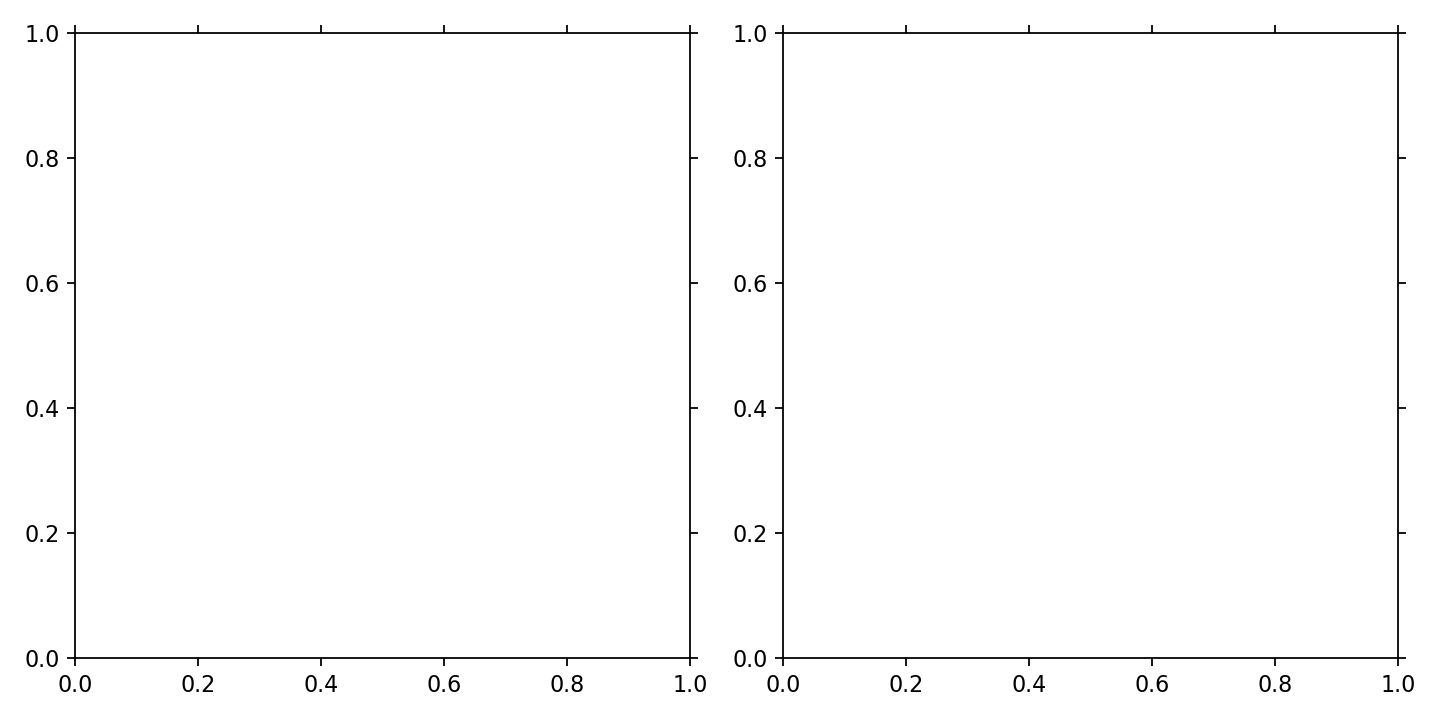

NameError: name 'x_Cu' is not defined

In [9]:
import config
from config import *
%matplotlib notebook


def load_h5(obj):
    global d_Cu, d_Zn, d_Ca, d_K, d_P, d_S
    
    norm_ch = NORM_CH
    value_offset=VALUE_OFFSET
    xrfdata = collections.defaultdict(list)

    with h5py.File(fc.selected, 'r') as dat:
        groups= list(dat.keys())
        maps= list(dat['MAPS'].keys())
        chs = dat['MAPS/channel_names'][:].astype(str).tolist()
#         dat['MAPS/']
#         print(chs)
        w_elm.options=chs
        w_elm.disabled=False
        w_hdf5.options=groups
        w_hdf5.disabled=False
        
        w_group_1.options=maps
        w_group_1.disabled=False
        
        w_group_2.options=maps
        w_group_2.disabled=False
        
        

        xrf = dat['MAPS/XRF_roi'][:]
#         print(xrf)
        
        scaler_names = dat['MAPS/scaler_names'][:].astype(str).tolist()
        scaler_val = dat['MAPS/scalers'][:]
        norm = scaler_val[scaler_names.index(norm_ch)]
        for e in chs:
            chidx = chs.index(e)
            xrfdata[e].append(xrf[chidx]/norm)
        xrfdata['scan_num'].append(fc.selected_filename)
        xrfdata['x_axis'].append(dat['exchange_4/x_axis'][:])
        xrfdata['y_axis'].append(dat['exchange_4/y_axis'][:])
    xrfdata = pd.DataFrame(xrfdata)
#     print(xrfdata)

    elms=['Cu','Zn','Ca', 'K', 'P', 'S']#Default elms
    for i, row in xrfdata.iterrows():
            sc = row['scan_num'][0:row['scan_num'].index('.')]
            for e in elms:
                d = row[e]
                
                d[np.isnan(d) | np.isinf(d)] = 0
                norm_d = (d - np.min(d)) / (np.max(d) - np.min(d)) + value_offset
                ss = np.round(np.abs(np.diff(row['x_axis']))[0], 2)
                
#     print('Image shape: ',d.shape)
    
    
    
    
    
    ax[0].clear()
    ax[1].clear()
    


    
    
    img1 = ax[0].pcolormesh(x_Cu, y_Cu, d_Cu, shading = 'gouraud')
    ax[0].axis('off')
    scalebar0 = ScaleBar( SCALE_UNIT_FACTOR*(x_Cu[1]-x_Cu[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax[0].add_artist(scalebar0)

    
    img2 = ax[1].pcolormesh(x_Zn, y_Zn, d_Zn, shading = 'gouraud')
    ax[1].axis('off')
    scalebar1 = ScaleBar( SCALE_UNIT_FACTOR*(x_Zn[1]-x_Zn[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax[1].add_artist(scalebar1)

    
    
    

    
    
#     fig.colorbar(img1, cax=cax1, orientation='horizontal')
#     fig.colorbar(img2, cax=cax2, orientation='horizontal')
#     fig.colorbar(img3, cax=cax3, orientation='horizontal')
    
    
#     fig_row_2.colorbar(img4, cax=cax1_row_2, orientation='horizontal')
#     fig_row_2.colorbar(img5, cax=cax2_row_2, orientation='horizontal')
#     fig_row_2.colorbar(img6, cax=cax3_row_2, orientation='horizontal')
    
#     fig.colorbar(img1, cax=cax1, orientation='horizontal').ax.tick_params(labelsize=4)
#     fig.colorbar(img2, cax=cax2, orientation='horizontal').ax.tick_params(labelsize=4)
#     fig.colorbar(img3, cax=cax3, orientation='horizontal').ax.tick_params(labelsize=4)
    
    
    
#     fig.colorbar(img1, cax=cax1, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
#     fig.colorbar(img2, cax=cax2, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
#     fig.colorbar(img3, cax=cax3, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    
    w_bin_info.disabled=False
    
    Resolution= str((x_Cu[1]-x_Cu[0]))
    
    w_bin_info.value= 'Resolution : ' + Resolution  + ' \n' + 'Image shape: ' +  str(d.shape[0]) + ' x ' + str(d.shape[1]) 
    
    
    
    w_status.disabled=False
    
    w_status.value='.h5 file in memory. Choose parameters for binary conversion. \n Data path : \n' + fc.selected 
    


    
fc = FileChooser(default_path)
fc.default_filename = '.h5'
btn_fc = widgets.Button(description = "Load XRF data (.h5)")

w_hdf5 = widgets.Dropdown(options=['Select .h5 file'], description='HDF5:', disabled=True)
w_elm = widgets.Dropdown(options=['Select .h5 file'], description='Element:', disabled=True)


w_group_1 = widgets.Dropdown(options=['Select .h5 file'], description='Group 1:', disabled=True)
w_group_2 = widgets.Dropdown(options=['Select .h5 file'], description='Group 2:', disabled=True)


display(HBox(children = [btn_fc,fc]))
display(HBox(children = [w_hdf5, w_elm]))
display(HBox(children = [w_group_1, w_group_2]))




w_bin_info = widgets.Textarea(description='Info.:', 
                             value='File information' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

w_status = widgets.Textarea(description='Status:', 
                             value='Status pane: Select file then click load .h5 file to begin.' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

display(HBox(children = [w_bin_info,w_status]))





global fig, ax
global img1,img2,img3, cbar1,cbar2,cbar3




fig, ax = plt.subplots(1,2,figsize=(9,4.5))
fig.tight_layout()



btn_fc.on_click(load_h5)

